In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("data/adult.data", index_col=False)
colNames = ["age", "workclass", "fnlwgt", "education", "educationNum", "maritalStatus", \
            "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", \
            "hoursPerWeek", "native-country", "amount"]
data.columns = colNames
# Note the first row of adult.test has been removed manually
testdata = pd.read_csv("data/adult.test", index_col=False)
testdata.columns = colNames
testdata['amount'] = np.where(testdata['amount'] == ' <=50K.', ' <=50K', '>50K')
# testdata

#Create dummy Variables

In [3]:
data_null= data.isnull()
data_null

age  workclass  fnlwgt  education  educationNum  maritalStatus  \
0      False      False   False      False         False          False   
1      False      False   False      False         False          False   
2      False      False   False      False         False          False   
3      False      False   False      False         False          False   
4      False      False   False      False         False          False   
...      ...        ...     ...        ...           ...            ...   
32555  False      False   False      False         False          False   
32556  False      False   False      False         False          False   
32557  False      False   False      False         False          False   
32558  False      False   False      False         False          False   
32559  False      False   False      False         False          False   

       occupation  relationship   race    sex  capital-gain  capital-loss  \
0           False         False  False  False         False         False   
1           False         False  False  False         False         False   
2           False         False  False  False         False         False   
3           False         False  False  False         False         False   
4           False         False  False  False         False         False   
...           ...           ...    ...    ...           ...           ...   
32555       False         False  False  False         False         False   
32556       False         False  False  False         False         False   
32557       False         False  False  False         False         False   
32558       False         False  False  False         False         False   
32559       False         False  False  False         False         False   

       hoursPerWeek  native-country  amount  
0             False           False   False  
1             False           False   False  
2             False           False   False  
3             False           False   False  
4             False           False   False  
...             ...             ...     ...  
32555         False           False   False  
32556         False           False   False  
32557         False           False   False  
32558         False           False   False  
32559         False           False   False  

[32560 rows x 15 columns]

<AxesSubplot:>

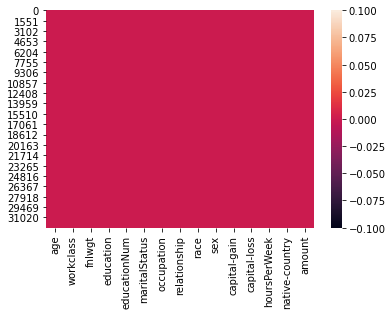

In [4]:
sns.heatmap(data.isnull())

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   educationNum    32560 non-null  int64 
 5   maritalStatus   32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hoursPerWeek    32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  amount          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
def dataFiltering(data):
    lenBefore = len(data)
    
    
# trim leading white spaces in dataframe
    cols = data.select_dtypes(['object']).columns
    data[cols] = data[cols].apply(lambda x: x.str.strip())
    
    data['target'] = np.where(data.amount == "<=50K", 0, 1)
    
# remove special characters from data    
    data = data[data["occupation"] != '?']
    data = data[data["workclass"] != '?']
    data = data[data["native-country"] != '?']

    lenAfter = len(data)

    if lenBefore != lenAfter:
         print("Length before filtering is ", lenBefore, ". Length after filter is ", lenAfter)
    # Remove two columns name is 'C' and 'D'
    data.drop(['fnlwgt', 'capital-gain', 'capital-loss'], axis = 1, inplace = True)
    
    return data

In [8]:
# filtering data set
data = dataFiltering(data)
data[data["target"] == 0]

Length before filtering is  32560 . Length after filter is  30161


age         workclass     education  educationNum       maritalStatus  \
0       50  Self-emp-not-inc     Bachelors            13  Married-civ-spouse   
1       38           Private       HS-grad             9            Divorced   
2       53           Private          11th             7  Married-civ-spouse   
3       28           Private     Bachelors            13  Married-civ-spouse   
4       37           Private       Masters            14  Married-civ-spouse   
...    ...               ...           ...           ...                 ...   
32552   32           Private       Masters            14       Never-married   
32554   22           Private  Some-college            10       Never-married   
32555   27           Private    Assoc-acdm            12  Married-civ-spouse   
32557   58           Private       HS-grad             9             Widowed   
32558   22           Private       HS-grad             9       Never-married   

              occupation   relationship                race     sex  \
0        Exec-managerial        Husband               White    Male   
1      Handlers-cleaners  Not-in-family               White    Male   
2      Handlers-cleaners        Husband               Black    Male   
3         Prof-specialty           Wife               Black  Female   
4        Exec-managerial           Wife               White  Female   
...                  ...            ...                 ...     ...   
32552       Tech-support  Not-in-family  Asian-Pac-Islander    Male   
32554    Protective-serv  Not-in-family               White    Male   
32555       Tech-support           Wife               White  Female   
32557       Adm-clerical      Unmarried               White  Female   
32558       Adm-clerical      Own-child               White    Male   

       hoursPerWeek native-country amount  target  
0                13  United-States  <=50K       0  
1                40  United-States  <=50K       0  
2                40  United-States  <=50K       0  
3                40           Cuba  <=50K       0  
4                40  United-States  <=50K       0  
...             ...            ...    ...     ...  
32552            11         Taiwan  <=50K       0  
32554            40  United-States  <=50K       0  
32555            38  United-States  <=50K       0  
32557            40  United-States  <=50K       0  
32558            20  United-States  <=50K       0  

[22653 rows x 13 columns]

In [9]:
# filtering testdata set
testdata = dataFiltering(testdata)
testdata[testdata["target"] == 0]

Length before filtering is  16280 . Length after filter is  15059


age    workclass     education  educationNum       maritalStatus  \
0       38      Private       HS-grad             9  Married-civ-spouse   
4       34      Private          10th             6       Never-married   
7       24      Private  Some-college            10       Never-married   
8       55      Private       7th-8th             4  Married-civ-spouse   
10      36  Federal-gov     Bachelors            13  Married-civ-spouse   
...    ...          ...           ...           ...                 ...   
16273   48    Local-gov       Masters            14            Divorced   
16274   33      Private     Bachelors            13       Never-married   
16275   39      Private     Bachelors            13            Divorced   
16277   38      Private     Bachelors            13  Married-civ-spouse   
16278   44      Private     Bachelors            13            Divorced   

            occupation   relationship                race     sex  \
0      Farming-fishing        Husband               White    Male   
4        Other-service  Not-in-family               White    Male   
7        Other-service      Unmarried               White  Female   
8         Craft-repair        Husband               White    Male   
10        Adm-clerical        Husband               White    Male   
...                ...            ...                 ...     ...   
16273    Other-service  Not-in-family               White    Male   
16274   Prof-specialty      Own-child               White    Male   
16275   Prof-specialty  Not-in-family               White  Female   
16277   Prof-specialty        Husband               White    Male   
16278     Adm-clerical      Own-child  Asian-Pac-Islander    Male   

       hoursPerWeek native-country amount  target  
0                50  United-States  <=50K       0  
4                30  United-States  <=50K       0  
7                40  United-States  <=50K       0  
8                10  United-States  <=50K       0  
10               40  United-States  <=50K       0  
...             ...            ...    ...     ...  
16273            40  United-States  <=50K       0  
16274            40  United-States  <=50K       0  
16275            36  United-States  <=50K       0  
16277            50  United-States  <=50K       0  
16278            40  United-States  <=50K       0  

[11359 rows x 13 columns]

In [10]:
def textToNumMap(df):
    #gender
    df['sex'] = np.where(df['sex'] == 'female', 0, 1)
    #race
    
    df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
    #marital
    df['maritalStatus'] = df['maritalStatus'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 
                                       'Married-AF-spouse': 6}).astype(int)
    #workclass
    df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6, 'Never-worked': 7}).astype(int)
    #education
    df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6,  'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
    #occupation
    df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
    #relationship
    df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)
     # hours per week (>40)=0 (=40)=1 (>40)=2
    df['hours'] = df['hoursPerWeek'].apply(lambda x: 0 if x < 40 else (1 if x == 40 else 2))
    #native country
    countryStr = """United-States,Cambodia,England,Puerto-Rico,Canada,Germany,Outlying-US(Guam-USVI-etc),India,Japan,Greece,South,China,Cuba,Iran,Honduras,Philippines,Italy,Poland,Jamaica,Vietnam,Mexico,Portugal,Ireland,France,Dominican-Republic,Laos,Ecuador,Taiwan,Haiti,Columbia,Hungary,Guatemala,Nicaragua,Scotland,Thailand,Yugoslavia,El-Salvador,Trinadad&Tobago,Peru,Hong,Holand-Netherlands"""
  
    cList = countryStr.split(',')
#     print(cList)
    cMap = {}
    i = 0
    for a in cList:
        cMap[a] = i
        i += 1
#     print(cMap)
    #df['nativeCountry'] = df['nativeCountry'].fillna(0)
    df['native-country'] = df['native-country'].map(cMap).astype(int)
    
    return df

In [11]:
dataF = pd.merge(data, testdata, how='outer')
dataF = textToNumMap(dataF)
dataF


In [27]:
from sklearn.model_selection import train_test_split
# Training and Predicting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
def Lmodel(data, target):
    logmodel = LogisticRegression( max_iter = 1000)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                        random_state=42)
    logmodel.fit(X_train,y_train)
#     print(X_train.shape)
#     print(X_test.shape)
#     print(y_train.shape)
#     print(y_test.shape)
    y_pred = logmodel.predict(X_test)
    Accuracy = metrics.accuracy_score(y_test, y_pred)
#     print(Accuracy)
#     print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
    # classification Report
#     print(classification_report(y_test,y_pred))
    return Accuracy

In [28]:
X = dataF[["age", "workclass", "education", "educationNum", "maritalStatus", "occupation", "relationship", 
           "race", "sex", "hoursPerWeek", "native-country"]]
y = dataF['target']
accuracy = Lmodel(X, y)
accuracy

0.8139670932358318

In [50]:
attributes_list = ["age", "workclass", "education", "educationNum", "maritalStatus", "occupation", "relationship", 
           "race", "sex", "hoursPerWeek", "native-country"]
list = []
accuracy = []
j = 0
for i in range(len(attributes_list)):
    j+=1
    if i < len(attributes_list):
        list.append(attributes_list[i])
        
        x = dataF[list]
        y = dataF['target']
        accuracy = Lmodel(x,y)
        print("for attributes ", list," accuracy is ", accuracy)
        list.clear() 
        
        

for attributes  ['age']  accuracy is  0.8139670932358318
for attributes  ['workclass']  accuracy is  0.8139670932358318
for attributes  ['education']  accuracy is  0.8139670932358318
for attributes  ['educationNum']  accuracy is  0.8139670932358318
for attributes  ['maritalStatus']  accuracy is  0.8139670932358318
for attributes  ['occupation']  accuracy is  0.8139670932358318
for attributes  ['relationship']  accuracy is  0.8139670932358318
for attributes  ['race']  accuracy is  0.8139670932358318
for attributes  ['sex']  accuracy is  0.8139670932358318
for attributes  ['hoursPerWeek']  accuracy is  0.8139670932358318
for attributes  ['native-country']  accuracy is  0.8139670932358318


In [49]:
attributes_list = ["age", "workclass", "education", "educationNum", "maritalStatus", "occupation", "relationship", 
           "race", "sex", "hoursPerWeek", "native-country"]
list = []
accuracy = []
j = 0
for i in range(len(attributes_list)):
    j+=1
    if i < len(attributes_list)-1:
        list.append(attributes_list[i])
        list.append(attributes_list[i+1])
        x = dataF[list]
        y = dataF['target']
        accuracy = Lmodel(x,y)
        print("for attributes ", list," accuracy is ", accuracy)
        list.clear() 
        
        

for attributes  ['age', 'workclass']  accuracy is  0.8139670932358318
for attributes  ['workclass', 'education']  accuracy is  0.8139670932358318
for attributes  ['education', 'educationNum']  accuracy is  0.8139670932358318
for attributes  ['educationNum', 'maritalStatus']  accuracy is  0.8139670932358318
for attributes  ['maritalStatus', 'occupation']  accuracy is  0.8139670932358318
for attributes  ['occupation', 'relationship']  accuracy is  0.8139670932358318
for attributes  ['relationship', 'race']  accuracy is  0.8139670932358318
for attributes  ['race', 'sex']  accuracy is  0.8139670932358318
for attributes  ['sex', 'hoursPerWeek']  accuracy is  0.8139670932358318
for attributes  ['hoursPerWeek', 'native-country']  accuracy is  0.8139670932358318


In [48]:
attributes_list = ["age", "workclass", "education", "educationNum", "maritalStatus", "occupation", "relationship", 
           "race", "sex", "hoursPerWeek", "native-country"]
list = []
accuracy = []
j = 0
for i in range(len(attributes_list)):
    j+=1
    if i < len(attributes_list)-2:
        list.append(attributes_list[i])
        list.append(attributes_list[i+1])
        list.append(attributes_list[i+2])
        x = dataF[list]
        y = dataF['target']
        accuracy = Lmodel(x,y)
        print("for attributes ", list," accuracy is ", accuracy)
        list.clear() 

for attributes  ['age', 'workclass', 'education']  accuracy is  0.8139670932358318
for attributes  ['workclass', 'education', 'educationNum']  accuracy is  0.8139670932358318
for attributes  ['education', 'educationNum', 'maritalStatus']  accuracy is  0.8139670932358318
for attributes  ['educationNum', 'maritalStatus', 'occupation']  accuracy is  0.8139670932358318
for attributes  ['maritalStatus', 'occupation', 'relationship']  accuracy is  0.8139670932358318
for attributes  ['occupation', 'relationship', 'race']  accuracy is  0.8139670932358318
for attributes  ['relationship', 'race', 'sex']  accuracy is  0.8139670932358318
for attributes  ['race', 'sex', 'hoursPerWeek']  accuracy is  0.8139670932358318
for attributes  ['sex', 'hoursPerWeek', 'native-country']  accuracy is  0.8139670932358318


In [47]:
attributes_list = ["age", "workclass", "education", "educationNum", "maritalStatus", "occupation", "relationship", 
           "race", "sex", "hoursPerWeek", "native-country"]
list = []
accuracy = []

for i in range(len(attributes_list)):
    
    if i < len(attributes_list)-3:
        list.append(attributes_list[i])
        list.append(attributes_list[i+1])
        list.append(attributes_list[i+2])
        list.append(attributes_list[i+3])
        x = dataF[list]
        y = dataF['target']
        accuracy = Lmodel(x,y)
        print("for attributes ", list," accuracy is ", accuracy)
        list.clear() 
        

for attributes  ['age', 'workclass', 'education', 'educationNum']  accuracy is  0.8139670932358318
for attributes  ['workclass', 'education', 'educationNum', 'maritalStatus']  accuracy is  0.8139670932358318
for attributes  ['education', 'educationNum', 'maritalStatus', 'occupation']  accuracy is  0.8139670932358318
for attributes  ['educationNum', 'maritalStatus', 'occupation', 'relationship']  accuracy is  0.8139670932358318
for attributes  ['maritalStatus', 'occupation', 'relationship', 'race']  accuracy is  0.8139670932358318
for attributes  ['occupation', 'relationship', 'race', 'sex']  accuracy is  0.8139670932358318
for attributes  ['relationship', 'race', 'sex', 'hoursPerWeek']  accuracy is  0.8139670932358318
for attributes  ['race', 'sex', 'hoursPerWeek', 'native-country']  accuracy is  0.8139670932358318
